In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\sensor_data\sensor_data\sub_data\ankle_accel\C01.csv"
df = pd.read_csv(file_path)

In [4]:
# Afficher les premières lignes
print("Preview of data:")
print(df.head())


Preview of data:
    timestamp  accel_x  accel_y  accel_z
0  1689960600   -0.375    -0.15   -1.150
1  1689960660   -0.300    -0.20   -1.125
2  1689960720   -0.350    -0.15   -1.150
3  1689960780   -0.350    -0.20   -1.150
4  1689960840   -0.325    -0.15   -1.125


In [7]:
# Vérifier les valeurs manquantes
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
timestamp    0
accel_x      0
accel_y      0
accel_z      0
dtype: int64


In [9]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
# Afficher la plage temporelle
print("\nTimestamp range:", df['timestamp'].min(), "to", df['timestamp'].max())
print("Datetime range:", df['datetime'].min(), "to", df['datetime'].max())



Timestamp range: 1689960600 to 1691150400
Datetime range: 2023-07-21 17:30:00 to 2023-08-04 12:00:00


In [11]:
print("Number of rows:", len(df))


Number of rows: 19831


In [13]:
print(df[['accel_x', 'accel_y', 'accel_z']].describe())


            accel_x       accel_y      accel_z
count  19831.000000  19831.000000  19831.00000
mean      -0.451529      0.293238     -0.46110
std        0.432826      0.513049      0.51869
min       -3.200000     -1.575000     -2.62500
25%       -1.000000     -0.150000     -1.15000
50%       -0.350000      0.000000     -0.32500
75%       -0.150000      0.900000     -0.10000
max        3.150000      3.150000      1.75000


In [15]:
# Calculer la différence entre chaque timestamp et le précédent
df['timestamp_diff'] = df['timestamp'].diff()

# Afficher les valeurs uniques de ces différences 
unique_steps = df['timestamp_diff'].dropna().unique()

print("Unique differences between timestamps (time steps):", unique_steps)


Unique differences between timestamps (time steps): [60.]


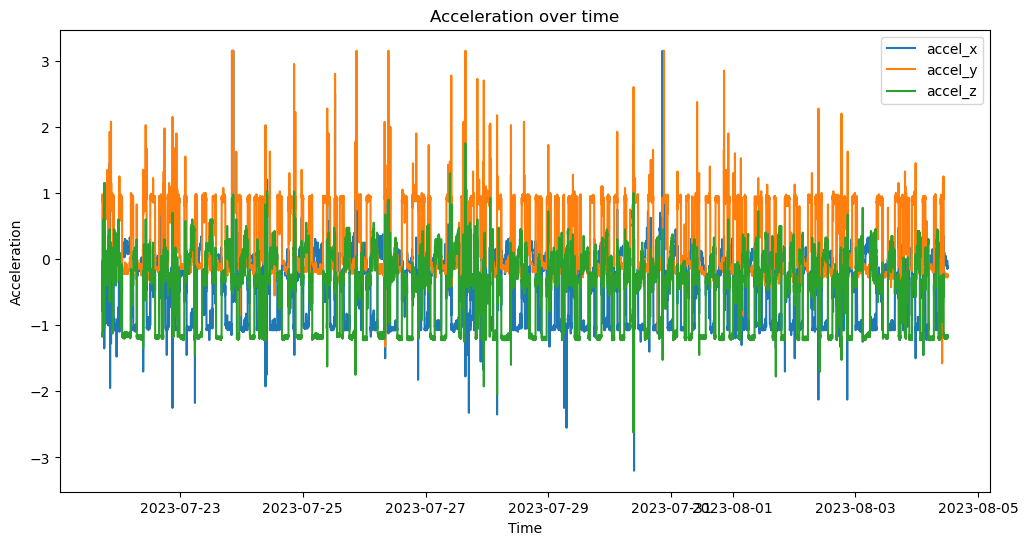

In [17]:
# Visualisation des accélérations dans le temps
plt.figure(figsize=(12,6))
plt.plot(df['datetime'], df['accel_x'], label='accel_x')
plt.plot(df['datetime'], df['accel_y'], label='accel_y')
plt.plot(df['datetime'], df['accel_z'], label='accel_z')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration over time')
plt.legend()
plt.show()

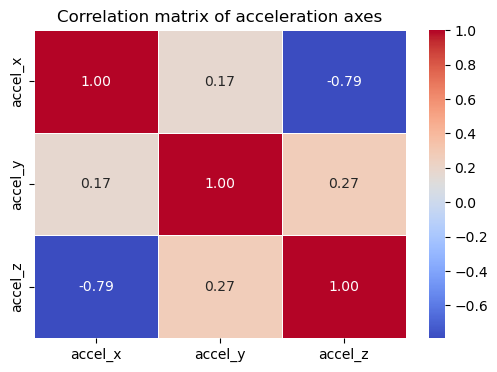

In [19]:
# Calcul de la matrice de corrélation
corr_matrix = df[['accel_x', 'accel_y', 'accel_z']].corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation matrix of acceleration axes')
plt.show()

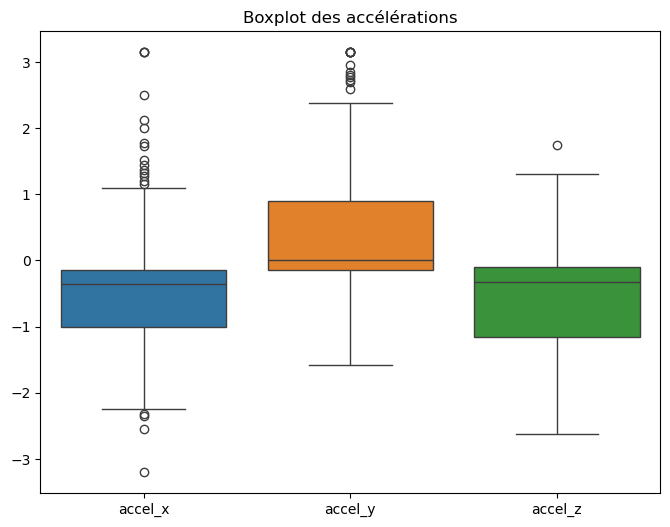

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['accel_x', 'accel_y', 'accel_z']])
plt.title('Boxplot des accélérations')
plt.show()

**jointure**

In [ ]:
import pandas as pd

df_behavior = pd.read_csv("C:/Users/rouat/Desktop/MMcows/Datasets/sensor_data/sensor_data/behavior_labels/individual/C01_0725.csv")
df_accel = pd.read_csv(r"C:\Users\rouat\Desktop\MMcows\Datasets\sensor_data/sensor_data/sub_data/ankle_accel/C01.csv")

print(df_behavior.head())
print(df_accel.head())

df_jointure = pd.merge(df_accel, df_behavior, on='timestamp', how='inner')

print(df_jointure.head())


    timestamp datetime  behavior
0  1690261200  0:00:00         0
1  1690261201  0:00:01         0
2  1690261202  0:00:02         0
3  1690261203  0:00:03         0
4  1690261204  0:00:04         0
    timestamp  accel_x  accel_y  accel_z
0  1689960600   -0.375    -0.15   -1.150
1  1689960660   -0.300    -0.20   -1.125
2  1689960720   -0.350    -0.15   -1.150
3  1689960780   -0.350    -0.20   -1.150
4  1689960840   -0.325    -0.15   -1.125
    timestamp  accel_x  accel_y  accel_z datetime  behavior
0  1690261200    0.225    -0.10   -1.175  0:00:00         0
1  1690261260    0.250    -0.15   -1.175  0:01:00         0
2  1690261320    0.225    -0.15   -1.125  0:02:00         0
3  1690261380    0.200    -0.15   -1.125  0:03:00         0
4  1690261440    0.200    -0.15   -1.175  0:04:00         0


In [22]:
print(df_jointure.shape[0])

1440


In [24]:
print(df_jointure['behavior'].unique())


[0 3 2 4 6 7 1]


In [26]:
# Nombre d'occurrences de chaque comportement
counts = df_jointure['behavior'].value_counts()
print(counts)

# Pourcentage d'occurrences de chaque comportement
percentages = df_jointure['behavior'].value_counts(normalize=True) * 100
print(percentages)


behavior
7    744
2    254
0    250
4    108
3     52
6     17
1     15
Name: count, dtype: int64
behavior
7    51.666667
2    17.638889
0    17.361111
4     7.500000
3     3.611111
6     1.180556
1     1.041667
Name: proportion, dtype: float64


In [28]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df_jointure.isnull().sum())

# Statistiques descriptives globales
print("\nStatistiques descriptives générales :")
print(df_jointure[['accel_x', 'accel_y', 'accel_z']].describe())

# Statistiques par comportement
print("\nStatistiques par comportement :")
print(df_jointure.groupby('behavior')[['accel_x', 'accel_y', 'accel_z']].describe())

Valeurs manquantes par colonne :
timestamp    0
accel_x      0
accel_y      0
accel_z      0
datetime     0
behavior     0
dtype: int64

Statistiques descriptives générales :
           accel_x      accel_y      accel_z
count  1440.000000  1440.000000  1440.000000
mean     -0.439983     0.283993    -0.462934
std       0.434374     0.503276     0.541057
min      -1.225000    -0.400000    -1.750000
25%      -0.975000    -0.125000    -1.150000
50%      -0.325000     0.025000    -0.300000
75%      -0.150000     0.900000     0.000000
max       2.500000     3.150000     0.550000

Statistiques par comportement :
         accel_x                                                          \
           count      mean       std    min    25%     50%    75%    max   
behavior                                                                   
0          250.0 -0.084100  0.273576 -1.000 -0.275 -0.0750  0.050  1.775   
1           15.0 -0.376667  0.286678 -1.025 -0.425 -0.3750 -0.350  0.450   
2      

In [30]:
import pandas as pd

behavior_map = {
    0: 'unknown',
    1: 'walking',
    2: 'standing',
    3: 'feeding_head_up',
    4: 'feeding_head_down',
    5: 'licking',
    6: 'drinking',
    7: 'lying'
}

df_jointure['behavior_name'] = df_jointure['behavior'].map(behavior_map)

# Créer les colonnes one-hot
df_onehot = pd.get_dummies(df_jointure['behavior_name']).astype(int)

df_final = pd.concat([df_jointure.drop(columns=['behavior', 'behavior_name']), df_onehot], axis=1)

# Afficher le résultat
print(df_final.head())


    timestamp  accel_x  accel_y  accel_z datetime  drinking  \
0  1690261200    0.225    -0.10   -1.175  0:00:00         0   
1  1690261260    0.250    -0.15   -1.175  0:01:00         0   
2  1690261320    0.225    -0.15   -1.125  0:02:00         0   
3  1690261380    0.200    -0.15   -1.125  0:03:00         0   
4  1690261440    0.200    -0.15   -1.175  0:04:00         0   

   feeding_head_down  feeding_head_up  lying  standing  unknown  walking  
0                  0                0      0         0        1        0  
1                  0                0      0         0        1        0  
2                  0                0      0         0        1        0  
3                  0                0      0         0        1        0  
4                  0                0      0         0        1        0  


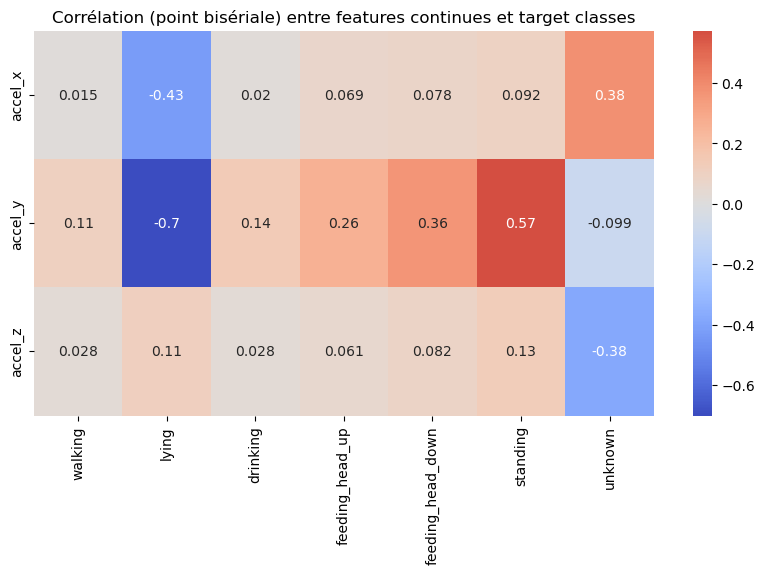

In [36]:
from scipy.stats import pointbiserialr
continuous_features = ['accel_x', 'accel_y', 'accel_z']

target_columns = ['walking', 'lying', 'drinking', 'feeding_head_up',
                  'feeding_head_down', 'standing', 'unknown']

# Calculer les corrélations
corr_dict = {}
for target in target_columns:
    corr_values = []
    for feature in continuous_features:
        corr, _ = pointbiserialr(df_final[target], df_final[feature])
        corr_values.append(corr)
    corr_dict[target] = corr_values

# Créer un DataFrame des corrélations
corr_df = pd.DataFrame(corr_dict, index=continuous_features)

# Afficher la heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélation (point bisériale) entre features continues et target classes')
plt.show()